# Practice Project 5 : Titanic Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import stats
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets
from sklearn import svm
#import sklearn.cross_validation

I. OBSERVATIONS IN LIST:

1. Rows x Coumnns= (891, 12)
2. No Null  Values Detected
3. There are 7 numerical columns
4. There are 5 categorical columns

II. Tabulated Observations:
Data View For Analysis:

DataFrame View: 
__________
View 1: Head View: 

__________
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0 

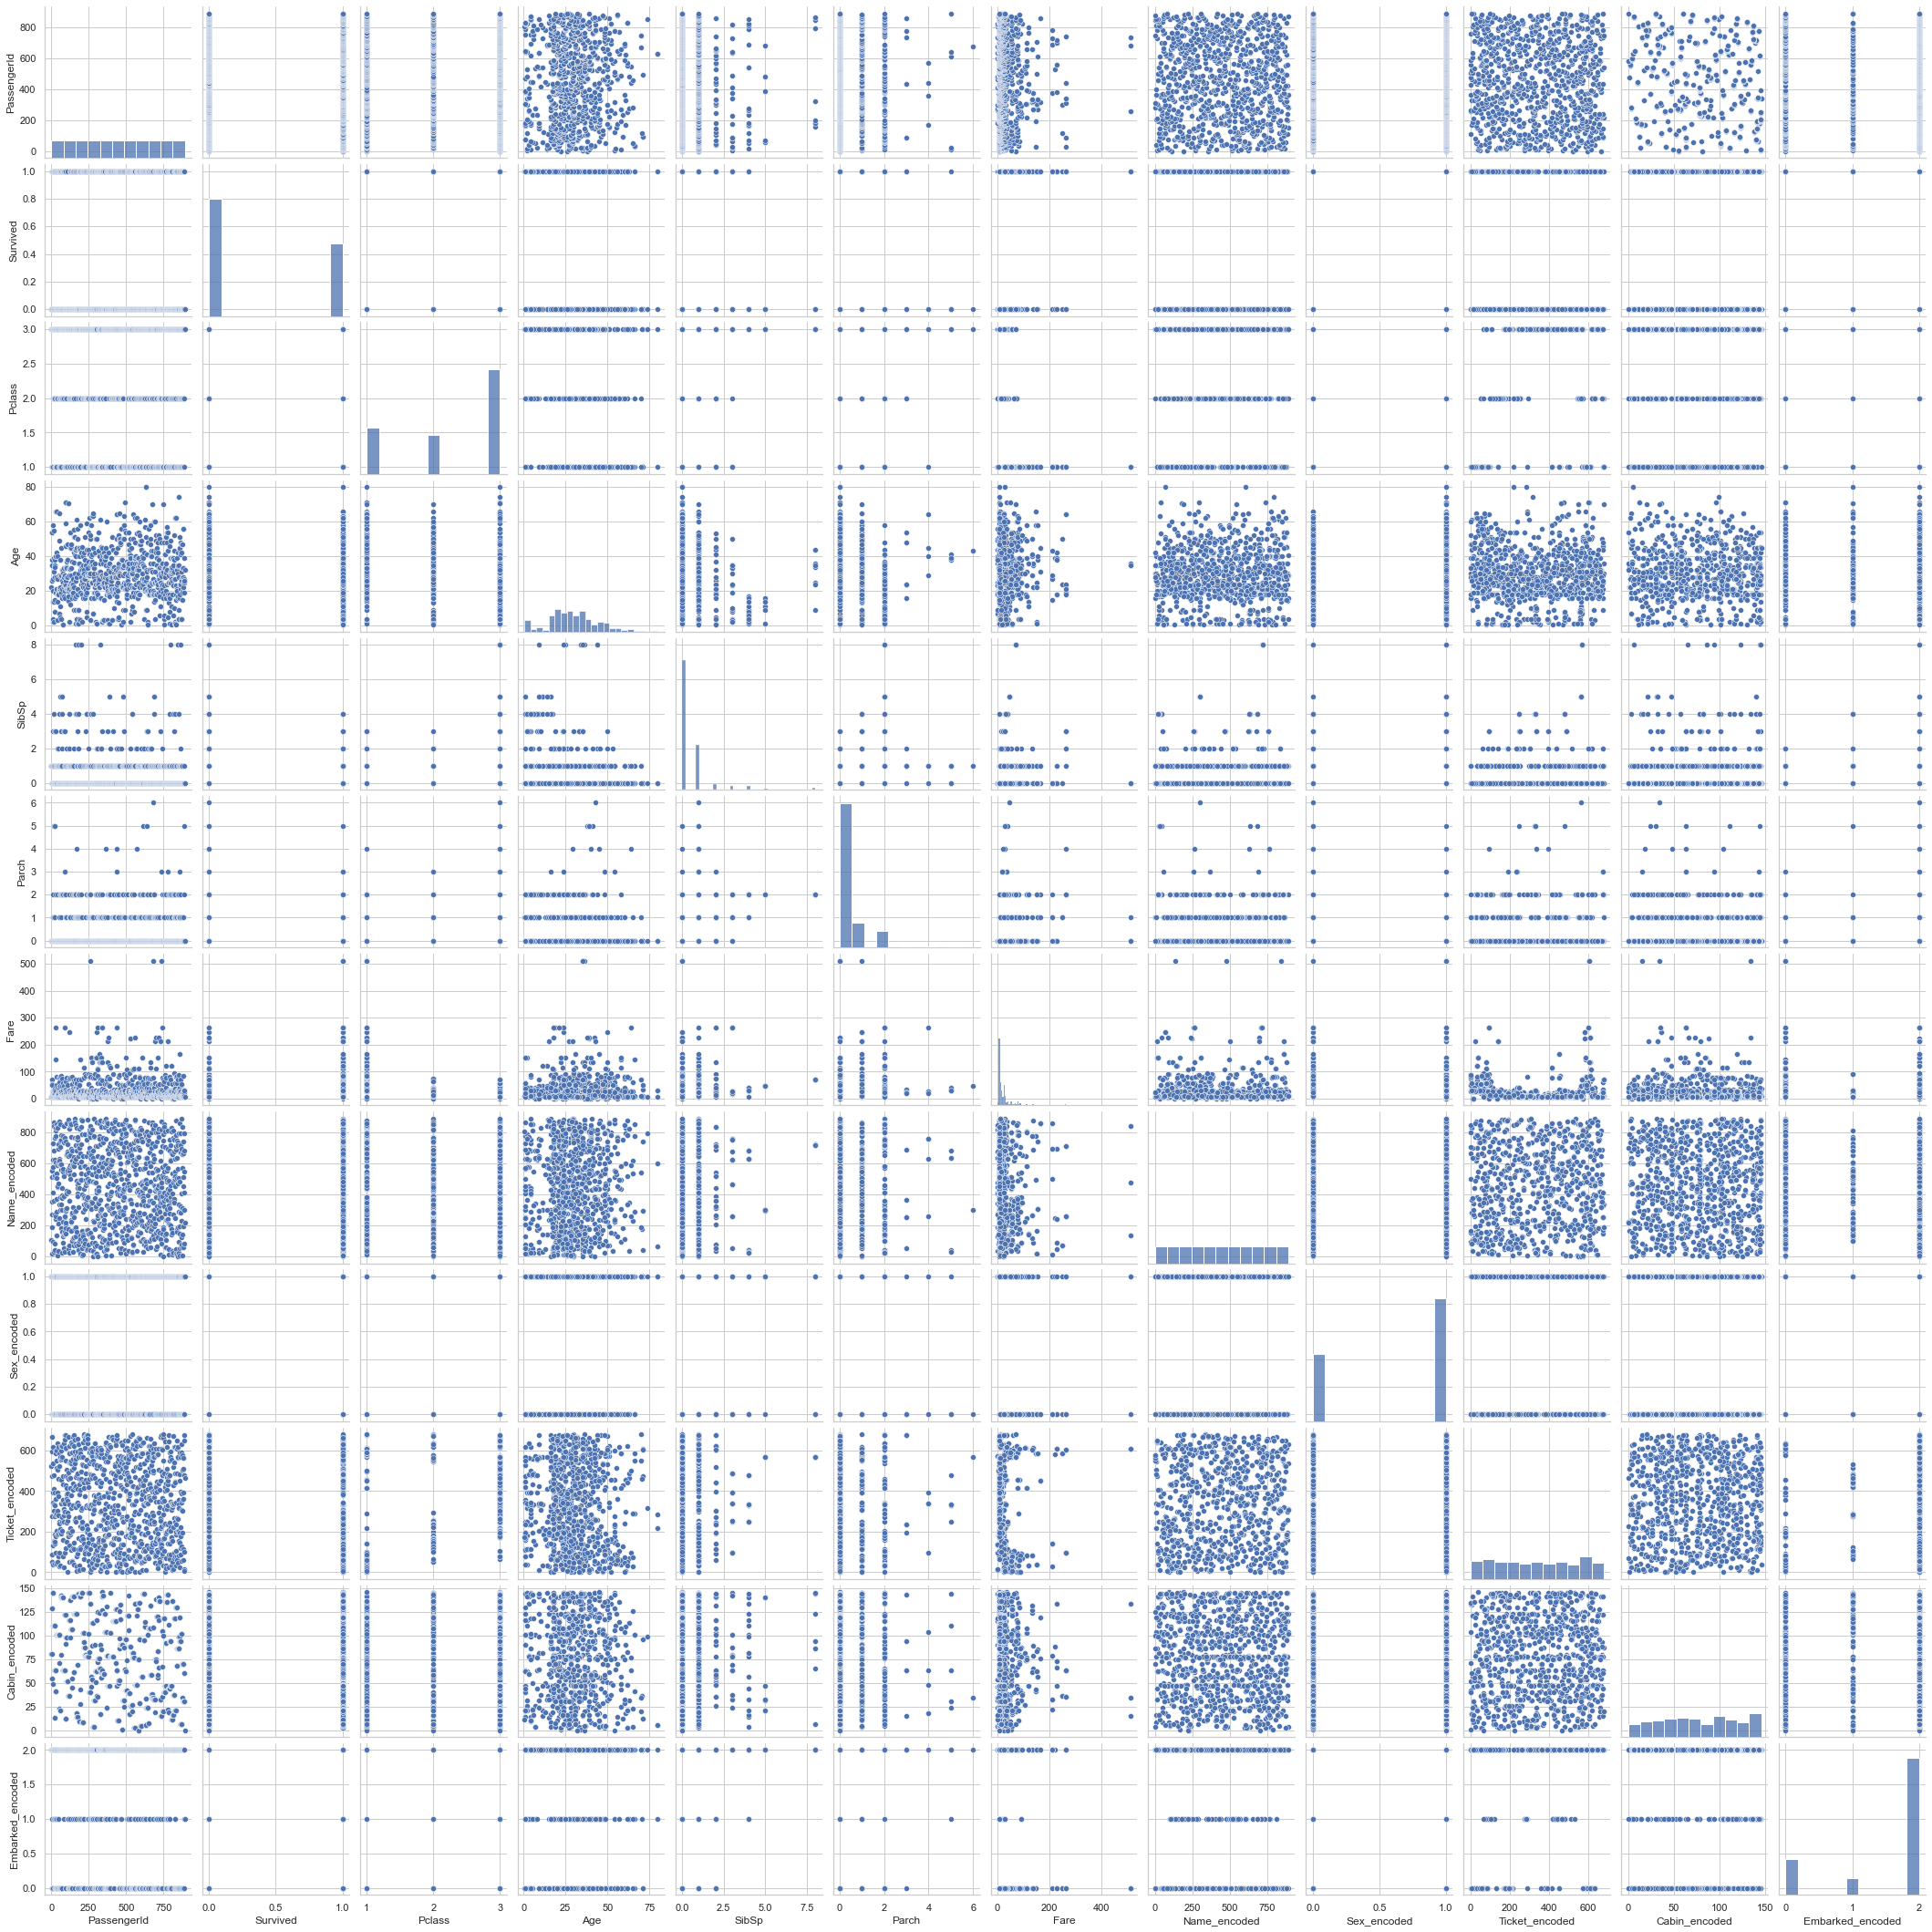

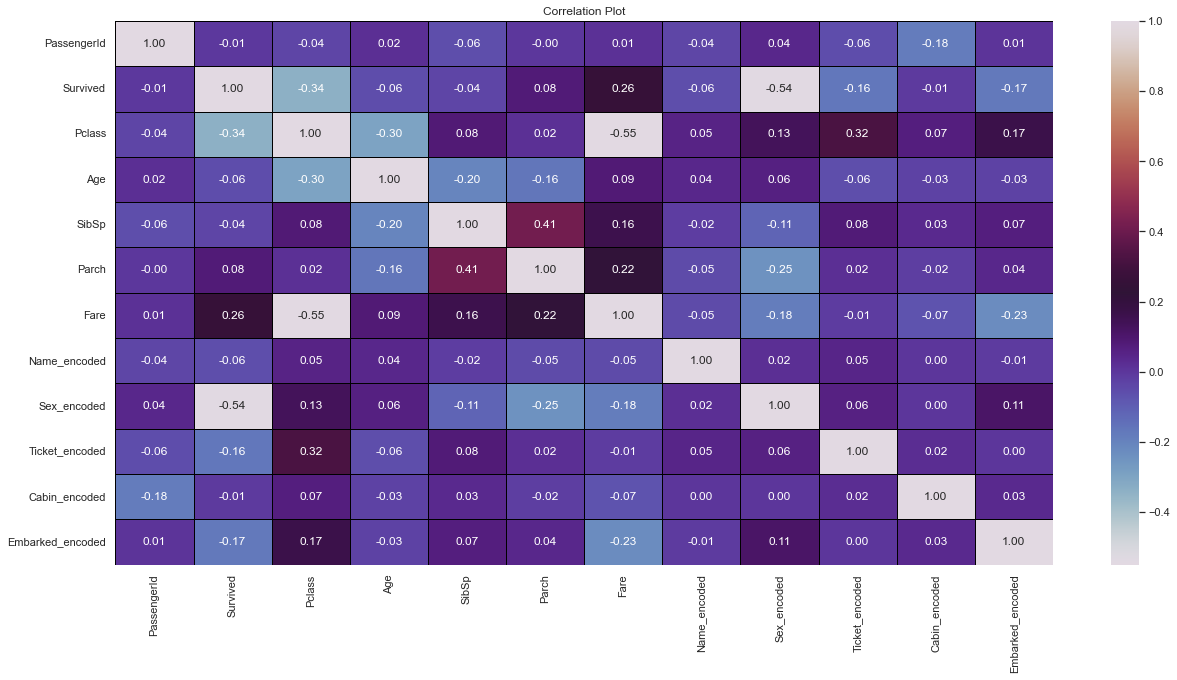

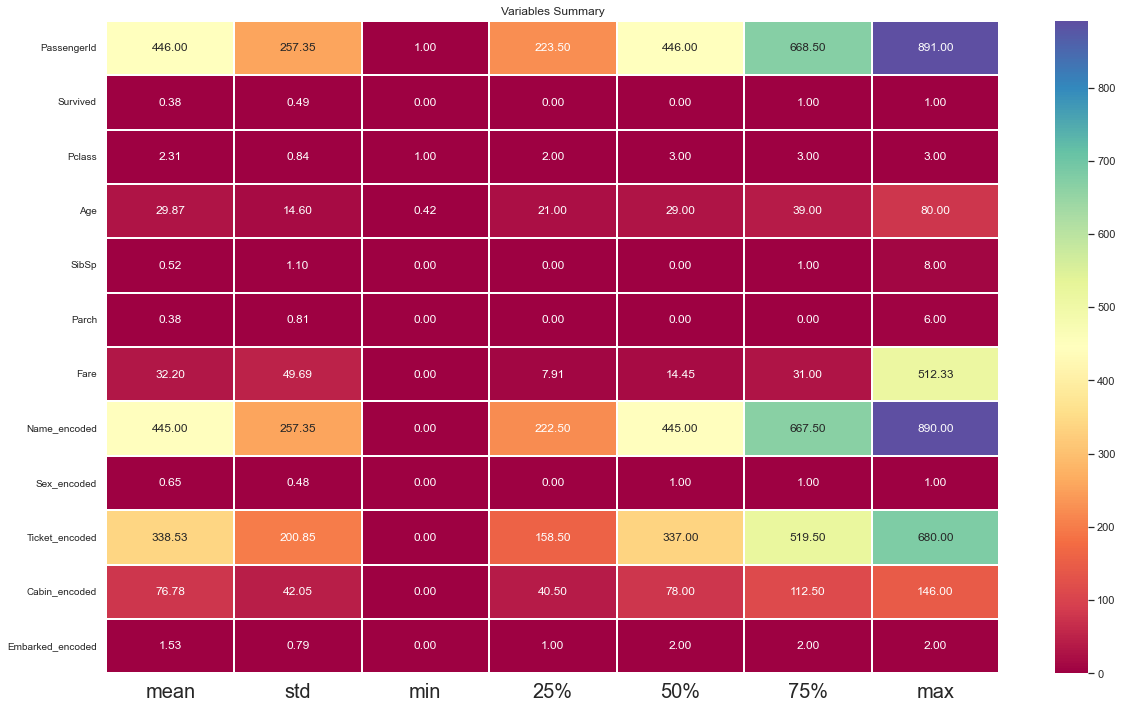

Distribution Plots Before Normalization
I. OBSERVATIONS IN LIST:

1. Skewness  Modelling: 
______________________________

    Normal Distribution has skewness=0, since that is not practically possible, hence, in predictive modelling,
          we take skewness threshold as +/-0.65. It is worth mentioning that skewness is  not the only parameter based
          on which we do feature selection

High quantum of skewness is detected
SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64
Embarked_encoded   -1.257476
dtype: float64
********** 100% **********
Highest skewness is found in:
Fare     4.787317
SibSp    3.695352
Parch    2.749117
dtype: float64
Embarked_encoded   -1.257476
dtype: float64
********** 100% **********
Right Skewness is present in: 
SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64
Left Skewness is present in: 
Embarked_encoded   -1.257476
dtype: float64
********** 100% **********
Acceptable skewness threshold of +/-0.65 is found in:


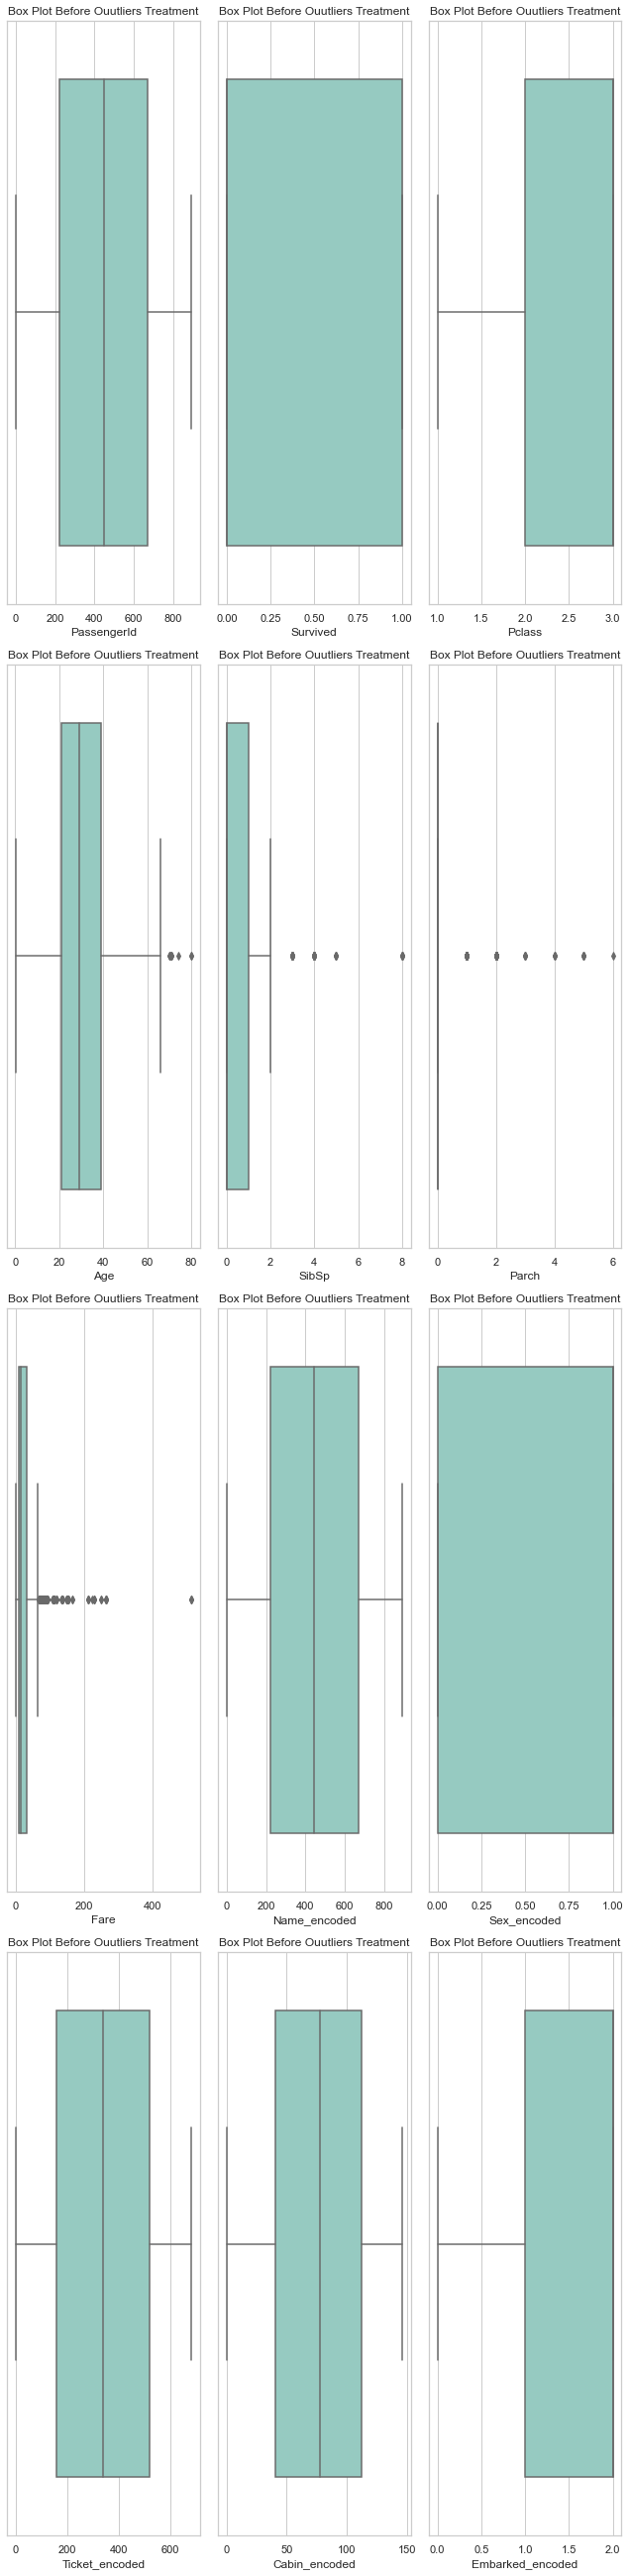

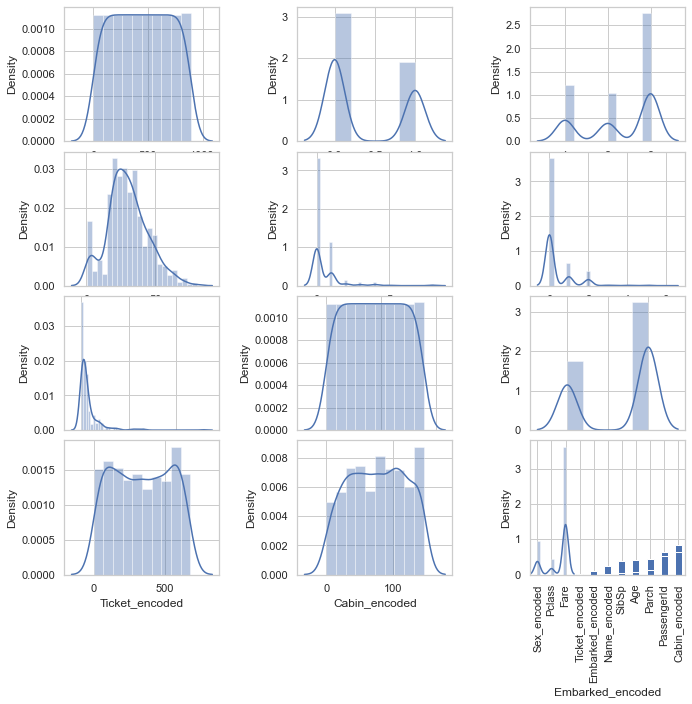

In [11]:
#https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv
def data_importing(url):
    '''
    Parameters:
    url: text
    
    Returns:
    <class 'pandas.core.frame.DataFrame'>
    
    Description:
    This function can be re-used to read csv files from https links. It stores the data in dataframe for further anysis
    and exploration.
    '''
    data=pd.read_csv(url)
    return data

def data_cleaning(data):
    '''
    Parameters:
    Data: <class 'pandas.core.frame.DataFrame'> 
    
    Returns:
    <class 'pandas.core.frame.DataFrame'>
    
    Description:
    This function can be re-used to study data type, data columns and its type, null values and its type.
    '''
    mydict={'Columns':data.columns}
    mydict_new={'Data Type':[type(data)], 'Data Columns Type':[type(data.columns)]}
    mydict11=[data.isnull().sum()]
    mydict1=[]
    for x in mydict11:
        mydict1.append(x)
    mydict2=[data.isna().values.any()]
    dataframe1=pd.DataFrame(mydict)
    dataframe2=pd.DataFrame(mydict1)
    dataframe3=pd.DataFrame(mydict2, columns=['red_wine_dataset_null_values'])
    dataframe4=pd.DataFrame(mydict_new)
    return dataframe1, dataframe2, dataframe3, dataframe4
def observations(data, dataframe1, dataframe2, dataframe3, dataframe4):
    '''
    Parameters:
    Data: <class 'pandas.core.frame.DataFrame'> 
    DataFrame1: <class 'pandas.core.frame.DataFrame'> 
    DataFrame2: <class 'pandas.core.frame.DataFrame'> 
    DataFrame3: <class 'pandas.core.frame.DataFrame'> 
    DataFrame4: <class 'pandas.core.frame.DataFrame'> 
    
    Returns:
    Print Strings;
    Tabulations
    
    This function is divided into 2 sections:
    I. automatically produces enlisted observations, and
    II. presents the data in various views to enable insightful glance.
    '''
    print('I. OBSERVATIONS IN LIST:', end='\n'*2)
    print('1. Rows x Coumnns=',data.shape)
    if dataframe2.isnull().values.any()==0:
        print('2. No Null  Values Detected')
    else:
        print('2. Null Values detected and need to be treated')
    print('3. There are {0} numerical columns'.format(len(data.select_dtypes(include = [np.number]).columns)))
    print('4. There are {0} categorical columns'.format(len(data.select_dtypes(include = [object]).columns)), end='\n'*2)
    print('II. Tabulated Observations:')
    print('Data View For Analysis:', end='\n'*2)
    print('DataFrame View: ')
    print('_'*10)
    print('View 1: Head View: ', end='\n'*2)
    print('_'*10)
    print(data.head(), end='\n'*2)
    print('*'*7,'100%','*'*7)
    print('View 2: Sample View: ', end='\n'*2)
    print('_'*10)
    print(data.sample(), end='\n'*2)
    print('*'*7,'100%','*'*7)
    print('View 3: Tail View: ', end='\n'*2)
    print('_'*10)
    print(data.tail(), end='\n'*2)
    print('*'*7,'100%','*'*7)
    print(dataframe1, end='\n')
    print('*'*10,'100%','*'*10)
    print(dataframe2, end='\n')
    print('*'*10,'100%','*'*10)
    print(dataframe3, end='\n')
    print('*'*10,'100%','*'*10)
    print(dataframe4, end='\n')
    print('*'*10,'100%','*'*10)

def data_cleaning1(data):
    data=data.fillna(method='bfill')
    return data

def ordinal_encoding(data):
    encoder = OrdinalEncoder()
    # transform data
    result = encoder.fit_transform(data.select_dtypes(include = [object]))
    encoded_data=pd.DataFrame(data=result, columns=data.select_dtypes(include = [object]).columns+'_'+'encoded')
    new_data=pd.concat([data, encoded_data], axis=1, ignore_index=False)
    new_data=new_data.fillna(0)
    return encoded_data, new_data
    
def eda(data):
    '''
    Parameters:
    Data: <class 'pandas.core.frame.DataFrame'> 
    
    Returns:
    <AxesSubplot:>;
    Print Strings
    
    This enables exploratory data analysis by visualizing vital information about data, visualizing correlations from different
    angles and exploring deeper into features by pairplots and Variables summary. In the background of twilight, the canvas is
    set to enable easy look through the data and analyze at the spur of the moment.
    '''
    print('Data Information By Columns:', end='\n')
    print('-'*30, end='\n'*2)
    print(data.info(), end='\n'*2)
    print('Correlation Among Data Columns:', end='\n')
    print('-'*30, end='\n'*2)
    print(data.corr(), end='\n'*2)
    print('Correlation Of Features With Label', end='\n')
    print('-'*30, end='\n'*2)
    print(data.corr()['Survived'], end='\n'*2)
    print('Skewness Modelling', end='\n')
    print('-'*30, end='\n'*2)    
    print(data.skew(), end='\n')
    sns.pairplot(data)
    plt.figure(figsize=(21,10))
    plt.title('Correlation Plot')
    sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f', cmap='twilight')
    plt.figure(figsize=(20,12))
    sns.heatmap(round(data.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='.2f', square=False, cmap="Spectral")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=10)
    plt.title('Variables Summary')
    plt.savefig('heatmap.png')
    plt.show()
    colist=data.select_dtypes(include = [np.number]).columns
    ncol=3
    nrows=10
    plt.figure(figsize=(ncol*3, ncol*30))
    for x in range(0,len(colist)):
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        plt.title('Box Plot Before Ouutliers Treatment')
        sns.boxplot(data[colist[x]], color='Black', palette='Set3')
        plt.tight_layout()
    colist=data.select_dtypes(include = [np.number]).columns
    print('Distribution Plots Before Normalization', end='\n')
    ncol=3
    nrows=10
    plt.figure(figsize=(ncol*3, ncol*30))
    for x in range(0,len(colist)):
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.distplot(data[colist[x]])
        plt.tight_layout()
def eda_observations(data):
    '''
    Parameters:
    Data: <class 'pandas.core.frame.DataFrame'> 
    
    Returns:
    Print Strings
    
    This enables exploratory data analysis by enlisted observations. These observations are generated once the attribute
    is run. This function is divided into 3 parts:
    1. Skewness Modeling = Analysis is generated automatically based on coded logic.
    2. Outliers Modeling = Analysis is generated automatically based on coded logic. 
    3. Correlation Modeling = Analysis is generated automatically based on coded logic.
    '''
    print('I. OBSERVATIONS IN LIST:', end='\n'*2)
    print('1. Skewness  Modelling: ', end='\n')
    print('_'*30, end='\n'*2)
    print('''    Normal Distribution has skewness=0, since that is not practically possible, hence, in predictive modelling,
          we take skewness threshold as +/-0.65. It is worth mentioning that skewness is  not the only parameter based
          on which we do feature selection''', end='\n'*2)
    if data.skew().any()>0.65 or data.skew.any()<0.65:
        print('High quantum of skewness is detected')
        print(data.skew()[data.skew()>0.65])
        print(data.skew()[data.skew()<-0.65])
    print('*'*10,'100%','*'*10)
    high_skewness=data.skew()[data.skew()>0.65].sort_values(ascending=False)
    left_skewness=data.skew()[data.skew()<-0.65]
    print('Highest skewness is found in:')
    print(high_skewness[:3])
    print(left_skewness[:3])
    print('*'*10,'100%','*'*10)
    if data.skew().any()>0.65 or data.skew().any()!=0:
        print('Right Skewness is present in: ')
        print(data.skew()[(data.skew()>0.65) & (data.skew()!=0)])
    if data.skew().any()<-0.65 or data.skew().any()!=0:
        print('Left Skewness is present in: ')
        print(data.skew()[(data.skew()<-0.65) & (data.skew()!=0)])
    print('*'*10,'100%','*'*10)
    print('Acceptable skewness threshold of +/-0.65 is found in:')
    print(data.skew()[(data.skew()<0.65) & (data.skew()>-0.65)])
    print('*'*10,'100%','*'*10)
    print('2. Outliers Modelling:', end='\n')
    print('_'*30, end='\n'*2)
    score=np.abs(stats.zscore(data.select_dtypes(include = [np.number])))
    print('Outliers are found in {0} rows * {1} columns'.format(score.shape[0], score.shape[1]))
    print('*'*30,'100%','*'*30)
    print('3. Correlation Modelling : ', end='\n')
    print('_'*30, end='\n'*2)
    print('Strong Correlation with label indicates high feature importance to predict the label and high correlation among features indicates high multicollinearity (resulting in redundancy in features and high dimensionality leading to overfitting and high dimensionality curses).', end='\n'*2)
    print('In the next few ponts, I have highlighted correlation of features with label', end='\n'*2)
    print('High Correlation, beyond the threshold of +/-0.5 is found in:', end='\n'*2)
    print(data.corr()['Survived'][(data.corr()['Survived']>0.5)|(data.corr()['Survived']<-0.5)], end='\n'*2)
    print('Positive Correlation of less than and equal +0.5 is found in:', end='\n'*2)
    print(data.corr()['Survived'][(data.corr()['Survived']==0.5) | (data.corr()['Survived']<0.5) & (data.corr()['Survived']>0)], end='\n'*2)
    print('Negative Correlation of greater than and equal -0.5 is found in:', end='\n'*2)
    print(data.corr()['Survived'][(data.corr()['Survived']==-0.5) | (data.corr()['Survived']>-0.5) & (data.corr()['Survived']<0)], end='\n'*2)
    print('*'*30,'100%','*'*30)

def outliers_treatment(data):
    '''
    Parameters:
    Data: <class 'pandas.core.frame.DataFrame'> 
    
    Returns:
    Outliers Values: <class 'pandas.core.frame.DataFrame'>
    Data New: <class 'pandas.core.frame.DataFrame'>
    
    This function can be res-used to calculate z score using statistical packages and removing all the values that have z score 
    greater than 3. Towards the end, it does a bit of feature engineering by classifying, wine quality greater than 7 as good
    wine quality and less than 7 as bad wine quality.
    '''
    try:
        q1=np.percentile(data.select_dtypes(include = [np.number]), 25, interpolation='midpoint')
        q3=np.percentile(data.select_dtypes(include = [np.number]), 75, interpolation='midpoint')
        iqr=q3-q1
        # Above Upper bound
        upper = data.select_dtypes(include = [np.number]) >= (q3+1.5*iqr)
        # Below Lower bound
        lower = data.select_dtypes(include = [np.number]) <= (q1-1.5*iqr)
        ''' Removing the Outliers '''
        data=data.select_dtypes(include = [np.number]).drop(upper, axis=1)
        data=data.select_dtypes(include = [np.number]).drop(lower, axis=1)
    except KeyError:
        result='No Values Found Beyond IQR.'
        return result
    finally:
        return upper, lower, data
def outliers_observations1(upper, lower):
    print("Upper Quartile:",upper)
    print(np.where(upper))
    print("Lower Quartile:", lower)
def vectorization(data_new):
    '''
    Parameters:
    Data New: <class 'pandas.core.frame.DataFrame'> 
    
    Returns:
    x: <class 'pandas.core.frame.DataFrame'>
    y: object
    
    This function can be res-used to divide the data into x and y vectors. X vector contains all the columns except
    quality and best quality. Y vector contains only best quality.
    '''        
    x=data_new.drop('Survived', axis=1)
    y=data_new['Survived']
    return x, y
def multicollinearity_treatment(x):
    '''
    Parameters:
    x: <class 'pandas.core.frame.DataFrame'>
    
    Returns:
    X_scaled: np.array 
    X_scaled_frame: <class 'pandas.core.frame.DataFrame'>
    vif: <class 'pandas.core.frame.DataFrame'>
    drop_features: <class 'pandas.core.frame.DataFrame'>
    features_lst: <class 'pandas.core.frame.DataFrame'>
    x: <class 'pandas.core.frame.DataFrame'>
    new_vif: <class 'pandas.core.frame.DataFrame'>
    
    
    This function applies standard scaler transformation on data, then calculates Variance Inflation Fctor to analyze
    multicollinearity. It drops 2 columns with multicollinearity greater than 6 and then checks, Variance Inflation Factor again.
    This time multicollinearity seemed below 6, mostly upto 3, hence, it retained all other features and stored the standard scaler
    features in a dataframe and redefines x vectorization with standard scaler features with mean=0 and variace=constant.
    Standard Scaler (Z)=(x-mean(x))std.
    '''            
    scaler=StandardScaler()
    X_scaled=scaler.fit_transform(x)
    X_scaled_frame=pd.DataFrame(X_scaled, columns=x.columns)
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
    vif['Features']=x.columns
    vif=vif.sort_values(ascending=False, by='vif')
    drop_features=vif[vif['vif']>6]
    features_lst=drop_features['Features'].values
    X_scaled_frame=X_scaled_frame.drop(features_lst, axis=1)
    X_scaled=np.array(X_scaled_frame)
    x=x.drop(features_lst, axis=1)
    new_vif=pd.DataFrame()
    new_vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
    new_vif['Features']=x.columns
    new_vif=new_vif.sort_values(ascending=False, by='vif')
    return X_scaled, X_scaled_frame, vif, drop_features, features_lst, x, new_vif
def multicollinearity_observations(vif, drop_features, new_vif):
    '''
    Parameters:
    vif: <class 'pandas.core.frame.DataFrame'>
    drop_features: <class 'pandas.core.frame.DataFrame'>
    new_vif: <class 'pandas.core.frame.DataFrame'>
    
    Returns:
    print strings.
    
    This function involves Multicollinearity Modeling. It looks at multricollinearity from varios angles:
    Multicollinearity Modelling = Analysis is generated automatically based on coded logic.
    '''        
    print('1. Multicollinearity  Modelling: ', end='\n')
    print('_'*30, end='\n'*2)
    print('Variance Inflation Factor For All The Features:', end='\n'*2)
    print(vif, end='\n'*2)
    print('*'*10,'100%','*'*10)
    print('Multicollinearity above 6 is found in these features:', end='\n'*2)
    print(drop_features, end='\n'*2)
    print('*'*10,'100%','*'*10)
    print('Multicollinearity after removal of highly correlated features is:', end='\n'*2)
    print(new_vif, end='\n'*2)
    print('*'*10,'100%','*'*10)
    print('Since, now all the features share multicollinearity of less than 6, we can go ahead with further predictive modelling', end='\n'*2)
    print('*'*10,'100%','*'*10)
def feature_selection(X_scaled_frame, y, x):
    '''
    Parameters:
    X_scaled_frame: <class 'pandas.core.frame.DataFrame'>
    y: <class 'pandas.core.frame.DataFrame'>
    x: <class 'pandas.core.frame.DataFrame'>
    
    Returns:
    p_values: <class 'pandas.core.frame.DataFrame'>
    x: <class 'pandas.core.frame.DataFrame'>
    x_train: <class 'pandas.core.frame.DataFrame'>
    x_test: <class 'pandas.core.frame.DataFrame'>
    y_train: object
    y_test: object
    
    This function split Standard scaled data into 2 parts:
    1) 90% train set.
    2) 10% test set.
    Then applying variance threshold filters all the features that have maximum explanatory power with 95% confidence.
    It then redefine x axis with the feature values of these filtered features and re-applies train and test split on the whole
    data:
    1) 90% train set.
    2) 10% test set.
    ''' 
    
    Xf_train, Xf_test, Y_train, Y_test=train_test_split(X_scaled_frame,y,test_size=0.70)
    constant_filter=VarianceThreshold(threshold=0.04)
    constant_filter.fit(Xf_train)
    Xf_train_filter=constant_filter.transform(Xf_train)
    Xf_test_filter=constant_filter.transform(Xf_test)
    sel=f_classif(Xf_train, Y_train)
    p_values=pd.Series(sel[1])
    p_values.index=Xf_train.columns
    p_values.sort_values(ascending=True, inplace=True)
    p_values.plot.bar(figsize=(10,20))
    p_values=p_values[p_values<0.05]
    p_values=pd.DataFrame(p_values, columns=['P Values'])
    p_values['Features']=p_values.index
    p_values=p_values[['Features', 'P Values']]
    x=x[p_values['Features']]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70)
    return p_values, x, x_train, x_test, y_train, y_test
def p_values_observations(p_values):
    '''
    Parameters:
    p_values: <class 'pandas.core.frame.DataFrame'>
    
    Returns:
    p_values: <class 'pandas.core.frame.DataFrame'>
    print strings.
    
    This explains the concept of p values more deeply and highlights the criteria for its filteration that are logically coded in
    the previous attributes.
    
    '''     
    print('''P Values are an important component of feature selection, with significance level set to 0.05, Variance Threshold
    ensemble technique returns with 95% confidence, all the features that have maximum explanatory capacity''')
    print('For the present dataset features with pvalues with less than 0.05 are:')
    print(p_values)
def model_development(x,y,x_train, y_train, x_test, y_test):
    '''
    Parameters:
    x: <class 'pandas.core.frame.DataFrame'>
    y: <class 'pandas.core.frame.DataFrame'>
    x_train: <class 'pandas.core.frame.DataFrame'>
    y_train: <class 'pandas.core.frame.DataFrame'>
    x_test: <class 'pandas.core.frame.DataFrame'>
    y_test: <class 'pandas.core.frame.DataFrame'>
    
    Returns:
    train prediction (4 Models): <class 'pandas.core.frame.DataFrame'>
    test prediction (4 Models): <class 'pandas.core.frame.DataFrame'>
    cross validation scores (2 Models): float
    grid search cross validation train scores (2 Models): float
    grid search cross validation test scores (2 Models): float
    best parameters (2 Models): object
    best estimators (2 MOdels): object
    MSE (4 Models): float
    RMSE (4 Models): float
    4 output files: pickle
    
    This models fits above exploration in 4 Models and returns relevant evaluation metrics:
    Model 1: RFC with random hyper parameter tuning
    Model 2:RFC with default hyper parameter tuning
    Model 3:RFC With Grid Search CV Hyper Parameter Tuning
    Model4:Bagging Classifier With Grid Search CV Hyper Parameter Tuning
    It saves each model in individual pickle files
    
    '''
    def model1():
        rfc=el(200, criterion='entropy', random_state=100, max_features='sqrt', min_weight_fraction_leaf=0.1, min_impurity_decrease=0.01, n_jobs=-1, warm_start=True, max_depth=30, max_leaf_nodes=10, ccp_alpha=1, oob_score=True, bootstrap=True)
        rfc.fit(x_train, y_train)
        model1_train_score=rfc.score(x_train, y_train)
        model1_test_score=rfc.score(x_test, y_test)
        scores=cross_val_score(rfc, x, y, cv=5)
        cv_scores=scores.mean()
        cv_risk=scores.std()
        y_pred=rfc.predict(x_train)
        ytst_pred=rfc.predict(x_test)
        mse=mean_squared_error(y_pred,y_train)
        rmse=np.sqrt(mse)
        mse_test=mean_squared_error(ytst_pred,y_test)
        rmse_test=np.sqrt(mse_test)
        model1_save=pickle.dumps(rfc)
        model1_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred})
        model1_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred})
        return model1_prediction_train, model1_prediction_test, rfc, model1_train_score, model1_test_score, scores, cv_scores, cv_risk, mse, rmse, mse_test, rmse_test, model1_save
    def model2():
        rfc1=el()
        rfc1.fit(x_train, y_train)
        model2_train_score=rfc1.score(x_train, y_train)
        model2_test_score=rfc1.score(x_test, y_test)
        scores1=cross_val_score(rfc1, x, y, cv=5)
        cv_scores1=scores1.mean()
        cv_risk1=scores1.std()
        y_pred1=rfc1.predict(x_train)
        ytst_pred1=rfc1.predict(x_test)
        mse1=mean_squared_error(y_pred1,y_train)
        rmse1=np.sqrt(mse1)
        mse_test1=mean_squared_error(ytst_pred1,y_test)
        rmse_test1=np.sqrt(mse_test1)
        model2_save=pickle.dumps(rfc1)
        model2_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred1})
        model2_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred1})
        return model2_prediction_train, model2_prediction_test, rfc1, model2_train_score, model2_test_score, scores1, cv_scores1, cv_risk1, mse1, rmse1, mse_test1, rmse_test1, model2_save
    def model3():
        rfc2=el()
        params = {
         'n_estimators': [50, 100],
         'max_features':['auto', 'sqrt', 'log2'],
         'criterion' : ['entropy', 'gini'],
         'bootstrap': [True, False],
         'oob_score':[True, False],
         'n_jobs':[None,-1],
         'warm_start':[True, False]
        }
        score2 = make_scorer(mean_squared_error)
        gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
        gridsearch.fit(x_train, y_train)
        best_parameters=gridsearch.best_params_
        best_score=gridsearch.best_score_
        best_estim=gridsearch.best_estimator_
        best_estim.fit(x_train,y_train)
        y_pred2=best_estim.predict(x_train)
        mse2 = mean_squared_error(y_pred2,y_train)
        model3_train_score=best_estim.score(x_train, y_train)
        model3_test_score=best_estim.score(x_test, y_test)
        rmse2=np.sqrt(mse2)
        ytst_pred2=best_estim.predict(x_test)
        mse_test2=mean_squared_error(ytst_pred2,y_test)
        rmse_test2=np.sqrt(mse_test2)
        model3_save=pickle.dumps(best_estim)
        model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2})
        model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2})
        return model3_prediction_train, model3_prediction_test, best_estim, best_parameters, best_score, model3_train_score, model3_test_score, score2, mse2, rmse2, mse_test2, rmse_test2, model3_save
    def model4():
        abreg1 = sklearn.ensemble.BaggingClassifier()
        params = {
         'n_estimators': [50, 100],
         'bootstrap': [True, False],
         'random_state': [0,10,100,1000,10000,100000,100000],
         'oob_score': [True, False]
         }
        score3 = make_scorer(mean_squared_error)
        gridsearch1=GridSearchCV(abreg1, params, cv=5, return_train_score=True)
        gridsearch1.fit(x_train, y_train)
        best_parameters1=gridsearch1.best_params_
        best_score1=gridsearch1.best_score_
        best_estim1=gridsearch1.best_estimator_
        best_estim1.fit(x_train,y_train)
        y_pred3=best_estim1.predict(x_train)
        mse3 = mean_squared_error(y_pred3,y_train)
        model4_train_score=best_estim1.score(x_train, y_train)
        model4_test_score=best_estim1.score(x_test, y_test)
        rmse3=np.sqrt(mse3)
        ytst_pred3=best_estim1.predict(x_test)
        mse_test3=mean_squared_error(ytst_pred3,y_test)
        rmse_test3=np.sqrt(mse_test3)
        model4_save=pickle.dumps(best_estim1)
        model4_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred3})
        model4_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred3})
        return model4_prediction_train, model4_prediction_test, best_estim1, best_parameters1, best_score1, model4_train_score, model4_test_score, score3, mse3, rmse3, mse_test3, rmse_test3, model4_save
    def model5():
        clf = svm.SVC(kernel='sigmoid')
        model5_prediction=clf.fit(x_train, y_train)
        cross_scores=clf.score(x_train, y_train)
        cross_risk=clf.score(x_test, y_test)
        return clf, cross_scores, cross_risk
    return model1(), model2(), model3(), model4(), model5()
def model_development_observations(model1_prediction, model2_prediction,model3_prediction, model4_prediction):
    '''
    Parameters:
    model1_prediction: <class 'pandas.core.frame.DataFrame'>,
    model2_prediction: <class 'pandas.core.frame.DataFrame'>,
    model3_prediction: <class 'pandas.core.frame.DataFrame'>, 
    model4_prediction: <class 'pandas.core.frame.DataFrame'>
    
    Returns:
    print strings.
    
    This function displays, test predictions and analyzes correct predictions.
    
    '''
    print('Test Analysis Of The 4 Models', end='\n')
    print('_'*30, end='\n'*2)
    print('Model 1: RFC with random hyper parameters tuning: ', end='\n')
    print('_'*30, end='\n'*2)
    print('Model 2: RFC with random default parameters tuning: ', end='\n')
    print('_'*30, end='\n'*2)
    print('Model3:RFC With Grid Search CV Hyper Parameter Tuning:', end='\n')
    print('_'*30, end='\n'*2)
    print('Model4:Bagging Classifier With Grid Search CV Hyper Parameter Tuning', end='\n')
    print('_'*30, end='\n'*2)
    print('Model5:Cross Validation With SVC', end='\n')
    print('_'*30, end='\n'*2)
    model1_prediction['Analysis']=model1_prediction['y_test']==model1_prediction['yhat']
    describe1=model1_prediction['Analysis'].describe()
    print(model1_prediction, end='\n'*2)
    print(describe1, end='\n'*2)
    model2_prediction['Analysis']=model2_prediction['y_test']==model2_prediction['yhat']
    describe2=model2_prediction['Analysis'].describe()
    print(model2_prediction, end='\n'*2)
    print(describe2, end='\n'*2)
    model3_prediction['Analysis']=model3_prediction['y_test']==model3_prediction['yhat']
    describe3=model3_prediction['Analysis'].describe()
    print(model3_prediction, end='\n'*2)
    print(describe3, end='\n'*2)
    model4_prediction['Analysis']=model4_prediction['y_test']==model4_prediction['yhat']
    describe4=model4_prediction['Analysis'].describe()
    print(model4_prediction, end='\n'*2)
    print(describe4, end='\n'*2)
def model_evaluation(model1_tain_score, model1_test_score, model1_cv_score, model1_cv_risk,model1_mse_train, model1_rmse_train, model1_mse_test, model1_rmse_test, model2_tain_score, model2_test_score, model2_cv_score, model2_cv_risk,model2_mse_train, model2_rmse_train, model2_mse_test, model2_rmse_test, best_parameters, best_score, model3_train_score, model3_test_score, mse2, rmse2, mse_test2, rmse_test2,best_parameters1, best_score1, model4_train_score, model4_test_score,mse3, rmse3, mse_test3, rmse_test3, cross_scores, cross_risk):
    '''
    
    Parameters:
    
    model1_tain_score: float
    model1_test_score: float 
    model1_cv_score: float
    model1_cv_risk: float
    model1_mse_train: float 
    model1_rmse_train: float 
    model1_mse_test: float
    model1_rmse_test: float 
    model2_tain_score: float
    model2_test_score: float
    model2_cv_score: float
    model2_cv_risk: float
    model2_mse_train: float
    model2_rmse_train: float
    model2_mse_test: float
    model2_rmse_test: float
    best_parameters: object
    best_score: float
    model3_train_score: float
    model3_test_score: float
    mse2: float
    rmse2: float
    mse_test2: float
    rmse_test2: float
    best_parameters1: float
    best_score1: float
    model4_train_score: float
    model4_test_score: float
    mse3: float
    rmse3: float
    mse_test3: float
    rmse_test3: float
    
    Returns:
    print strings.
    
    This function displays, train, test, cross validation, mse, rmse, best scores for each model.
    
    '''
    print('Model Evaluation',end='\n')
    print('_'*30, end='\n'*2)
    print('Model 1: RFC with random hyper parameter tuning: ')
    print('_'*30, end='\n'*2)
    print('Scores generation:', end='\n')
    print('*'*30,'100%','*'*30)
    score_frame=pd.DataFrame({'Train Score':[model1_tain_score],'Test Score':[model1_test_score],'Cross Validation Score':[model1_cv_score],'Mean Squared Error Train':[model1_mse_train],'Root Mean Squared Error Train':[model1_rmse_train],'Mean Squared Error Test':[model1_mse_test],'Root Mean Squared Error Test':[model1_rmse_test],'Cross Validation Risk':[model1_cv_risk]})
    print(score_frame)
    print('Model 2:RFC with default hyper parameter tuning:')
    print('_'*30, end='\n'*2)
    print('Scores generation:', end='\n')
    print('*'*30,'100%','*'*30)    
    score_frame2=pd.DataFrame({'Train Score':[model2_tain_score],'Test Score':[ model2_test_score],'Cross Validation Score':[model2_cv_score],'Mean Squared Error Train':[model2_mse_train],'Root Mean Squared Error Train':[model2_rmse_train],'Mean Squared Error Test':[model2_mse_test],'Root Mean Squared Error Test':[model2_rmse_test],'Cross Validation Risk':[model2_cv_risk]})
    print(score_frame2)
    print('Model3:RFC With Grid Search CV Hyper Parameter Tuning:')
    print('_'*30, end='\n'*2)
    print('Best Parameters ',best_parameters)
    print('Scores generation:', end='\n')
    print('*'*30,'100%','*'*30) 
    score_frame3=pd.DataFrame({'Best Score':[best_score],'Grid Search Cross Validation Train Score':[model3_train_score],'Grid Search Cross Validation Test Score':[model3_test_score],'Mean Squared Error Train':[mse2],'Root Mean Squared Error Train':[rmse2],'Mean Squared Error Test':[mse_test2],'Root Mean Squared Error Test':[rmse_test2]})
    print(score_frame3)
    print('Model4:Bagging Classifier With Grid Search CV Hyper Parameter Tuning')
    print('_'*30, end='\n'*2)
    print('Best Parameters ',best_parameters1)
    print('Scores generation:', end='\n')
    print('*'*30,'100%','*'*30) 
    score_frame4=pd.DataFrame({'Best Score':[best_score1],'Grid Search Cross Validation Train Score':[model4_train_score],'Grid Search Cross Validation Test Score':[model4_test_score],'Mean Squared Error Train':[mse3],'Root Mean Squared Error Train':[rmse3],'Mean Squared Error Test':[mse_test3],'Root Mean Squared Error Test':[mse_test3]})
    print(score_frame4)
    print('Model5:Cross Validation On SVC')
    print('_'*30, end='\n'*2)
    print('Cross Validation Scores', cross_scores)
    print('Cross Validation Risk', cross_risk)
def model_modification(data_new):
    '''
    Parameters:
    Data New: <class 'pandas.core.frame.DataFrame'>
    
    Returns:
    x: <class 'pandas.core.frame.DataFrame'>
    y: <class 'pandas.core.frame.DataFrame'>
    x_train: <class 'pandas.core.frame.DataFrame'>
    x_test: <class 'pandas.core.frame.DataFrame'>
    y_train: <class 'pandas.core.frame.DataFrame'>
    y_test: <class 'pandas.core.frame.DataFrame'>
    scaled_features: <class 'pandas.core.frame.DataFrame'>
    
    This function takes unscaled splitted data as input and doess upsampling of y vector by concating train and test splits and
    applying scikit learn utils library. It now has Y vector and X vector in a single dataframe slices whole data with good
    quality and bad quality and then does upsampling to make 0 and 1 values equal in numberm, thus, reducing bias in the model.
    It then does feature selection based on p values and applies min max scaler.
    
    After x and y vectors are redefined, it splits the data into:
    1) 90% train set;
    2) 10% test set.
    
    '''
    def resampling():
        x,y=vectorization(data_new)
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
        X=pd.concat([x_train, y_train], axis=1)
        not_good=X[X['Survived']==0]
        good=X[X['Survived']==1]
        good_upsampled=resample(good, replace=True, n_samples=len(not_good), random_state=0)
        upsampled=pd.concat([not_good, good_upsampled])
        upsampled['Survived'].value_counts()
        x=upsampled.drop('Survived', axis=1)
        y=upsampled['Survived']
        Xf_train, Xf_test, Y_train, Y_test=train_test_split(x,y,test_size=0.1)
        constant_filter=VarianceThreshold(threshold=0.04)
        constant_filter.fit(Xf_train)
        Xf_train_filter=constant_filter.transform(Xf_train)
        Xf_test_filter=constant_filter.transform(Xf_test)
        sel=f_classif(Xf_train, Y_train)
        p_values=pd.Series(sel[1])
        p_values.index=Xf_train.columns
        p_values.sort_values(ascending=True, inplace=True)
        p_values.plot.bar(figsize=(10,20))
        p_values=p_values[p_values<0.05]
        p_values=pd.DataFrame(p_values, columns=['P Values'])
        p_values['Features']=p_values.index
        p_values=p_values[['Features', 'P Values']]
        x=x[p_values['Features']]
        scaler = MinMaxScaler([0,1])
        model=scaler.fit(x)
        scaled_features=model.transform(x)
        scaled_features=pd.DataFrame(scaled_features, columns=x.columns)
        x_train,x_test,y_train,y_test=train_test_split(scaled_features,y,test_size=0.1)
        return x, y, x_train,x_test,y_train,y_test, scaled_features
    return resampling()
def modified_model(x, y, x_train,x_test,y_train,y_test):
    '''
    Parameters:
    Data New: <class 'pandas.core.frame.DataFrame'>
    
    Returns:
    x: <class 'pandas.core.frame.DataFrame'>
    y: <class 'pandas.core.frame.DataFrame'>
    x_train: <class 'pandas.core.frame.DataFrame'>
    x_test: <class 'pandas.core.frame.DataFrame'>
    y_train: <class 'pandas.core.frame.DataFrame'>
    y_test: <class 'pandas.core.frame.DataFrame'>
    
    This function runs all the 4 models by plugging in redefined vectors.
    
    '''
    new_models=model_development(x, y, x_train,y_train, x_test, y_test)
    return new_models
def model_re_evaluation(model1_tain_score, model1_test_score, model1_cv_score, model1_cv_risk,model1_mse_train, model1_rmse_train, model1_mse_test, model1_rmse_test, model2_tain_score, model2_test_score, model2_cv_score, model2_cv_risk,model2_mse_train, model2_rmse_train, model2_mse_test, model2_rmse_test, best_parameters, best_score, model3_train_score, model3_test_score, mse2, rmse2, mse_test2, rmse_test2,best_parameters1, best_score1, model4_train_score, model4_test_score,mse3, rmse3, mse_test3, rmse_test3, cross_scores, cross_risk):
    '''
    
    Parameters:
    
    model1_tain_score: float
    model1_test_score: float 
    model1_cv_score: float
    model1_cv_risk: float
    model1_mse_train: float 
    model1_rmse_train: float 
    model1_mse_test: float
    model1_rmse_test: float 
    model2_tain_score: float
    model2_test_score: float
    model2_cv_score: float
    model2_cv_risk: float
    model2_mse_train: float
    model2_rmse_train: float
    model2_mse_test: float
    model2_rmse_test: float
    best_parameters: object
    best_score: float
    model3_train_score: float
    model3_test_score: float
    mse2: float
    rmse2: float
    mse_test2: float
    rmse_test2: float
    best_parameters1: float
    best_score1: float
    model4_train_score: float
    model4_test_score: float
    mse3: float
    rmse3: float
    mse_test3: float
    rmse_test3: float
    
    Returns:
    print strings.
    
    This function displays, train, test, cross validation, mse, rmse, best scores for each re-defined model.
    
    '''   
    print('Model Evaluation',end='\n')
    print('_'*30, end='\n'*2)
    print('Model 1: RFC with random hyper parameter tuning: ')
    print('_'*30, end='\n'*2)
    print('Scores generation:', end='\n')
    print('*'*30,'100%','*'*30)
    score_frame=pd.DataFrame({'Train Score':[model1_tain_score],'Test Score':[model1_test_score],'Cross Validation Score':[model1_cv_score],'Mean Squared Error Train':[model1_mse_train],'Root Mean Squared Error Train':[model1_rmse_train],'Mean Squared Error Test':[model1_mse_test],'Root Mean Squared Error Test':[model1_rmse_test],'Cross Validation Risk':[model1_cv_risk]})
    print(score_frame)
    print('Model 2:RFC with default hyper parameter tuning:')
    print('_'*30, end='\n'*2)
    print('Scores generation:', end='\n')
    print('*'*30,'100%','*'*30)    
    score_frame2=pd.DataFrame({'Train Score':[model2_tain_score],'Test Score':[ model2_test_score],'Cross Validation Score':[model2_cv_score],'Mean Squared Error Train':[model2_mse_train],'Root Mean Squared Error Train':[model2_rmse_train],'Mean Squared Error Test':[model2_mse_test],'Root Mean Squared Error Test':[model2_rmse_test],'Cross Validation Risk':[model2_cv_risk]})
    print(score_frame2)
    print('Model3:RFC With Grid Search CV Hyper Parameter Tuning:')
    print('_'*30, end='\n'*2)
    print('Best Parameters ',best_parameters)
    print('Scores generation:', end='\n')
    print('*'*30,'100%','*'*30) 
    score_frame3=pd.DataFrame({'Best Score':[best_score],'Grid Search Cross Validation Train Score':[model3_train_score],'Grid Search Cross Validation Test Score':[model3_test_score],'Mean Squared Error Train':[mse2],'Root Mean Squared Error Train':[rmse2],'Mean Squared Error Test':[mse_test2],'Root Mean Squared Error Test':[rmse_test2]})
    print(score_frame3)
    print('Model4:Bagging Classifier With Grid Search CV Hyper Parameter Tuning')
    print('_'*30, end='\n'*2)
    print('Best Parameters ',best_parameters1)
    print('Scores generation:', end='\n')
    print('*'*30,'100%','*'*30) 
    score_frame4=pd.DataFrame({'Best Score':[best_score1],'Grid Search Cross Validation Train Score':[model4_train_score],'Grid Search Cross Validation Test Score':[model4_test_score],'Mean Squared Error Train':[mse3],'Root Mean Squared Error Train':[rmse3],'Mean Squared Error Test':[mse_test3],'Root Mean Squared Error Test':[mse_test3]})
    print(score_frame4)
    print('Model 5')
    print(cross_scores)
    print(cross_risk)
def main():
    '''
    
    Parameters:
    None
    
    Returns:
    print strings.
    
    This function is the end point and runs all the above functions.
    
    '''
    data1=data_importing('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
    data_study=data_cleaning(data1)
    observations(data1, data_study[0], data_study[1], data_study[2], data_study[3])
    data11=data_cleaning1(data1)
    print(data11)
    enc=ordinal_encoding(data11)
    print('Encoded Data\n','_'*len('Encoded Data'), end='\n'*2)
    print(enc[1])
    eda(enc[1])
    eda_observations(enc[1])
    try:
        print('Data After Outliers Removal By IQR Method')
        data_new=outliers_treatment(enc[1])
        print(data_new)
        outliers_observations1(data_new[0], data_new[1])
        x,y=vectorization(data_new[2])
    except KeyError:
        x,y=vectorization(enc[1].select_dtypes(include = [np.number]))
    mul=multicollinearity_treatment(x)
    multicollinearity_observations(multicollinearity_treatment(vectorization(enc[1].select_dtypes(include = [np.number]))[0])[2], multicollinearity_treatment(vectorization(enc[1].select_dtypes(include = [np.number]))[0])[3], multicollinearity_treatment(vectorization(enc[1].select_dtypes(include = [np.number]))[0])[6])
    feature=feature_selection(mul[1], y, x)
    p_values_observations(feature[0])
    models=model_development(feature[1], y, feature[2], feature[4], feature[3], feature[5])
    mdo=model_development_observations(models[0][1], models[1][1], models[2][1], models[3][1])
    me=model_evaluation(models[0][3], models[0][4], models[0][6],models[0][7], models[0][8], models[0][9], models[0][10], models[0][11],models[1][3],models[1][4],models[1][6], models[1][7],models[1][8],models[1][9], models[1][10], models[1][11], models[2][3], models[2][4], models[2][5], models[2][6], models[2][8], models[2][9], models[2][10],models[2][11], models[3][3], models[3][4], models[3][5], models[3][6], models[3][8], models[3][9], models[3][10], models[3][11], models[4][1], models[4][2])
    print('Resampling Of Label and Applying Max Scaler To The Existing 4 Models:', end='\n')
    print('_'*30, end='\n'*2)
    x, y, x_train,x_test,y_train,y_test, scaled_features=model_modification(enc[1].select_dtypes(include = [np.number]))
    new_models=modified_model(x, y, x_train,x_test,y_train,y_test)
    re_evaluation=model_re_evaluation(new_models[0][3], new_models[0][4], new_models[0][6],new_models[0][7], new_models[0][8], new_models[0][9], new_models[0][10], new_models[0][11],new_models[1][3],new_models[1][4],new_models[1][6], new_models[1][7],new_models[1][8],new_models[1][9], new_models[1][10], new_models[1][11], new_models[2][3], new_models[2][4], new_models[2][5], new_models[2][6], new_models[2][8], new_models[2][9], new_models[2][10],new_models[2][11], new_models[3][3], new_models[3][4], new_models[3][5], new_models[3][6], new_models[3][8], new_models[3][9], new_models[3][10], new_models[3][11], new_models[4][1], new_models[4][2])
if __name__=='__main__':
    main()

# Conclusions
After upsampling and min max scaling, the models' performaces have improved to as high as 100% and overfitting is corrected to a great extent. Best Fitted Model is:
Model4:Bagging Classifier With Grid Search CV Hyper Parameter Tuning
______________________________

Best Parameters  {'bootstrap': True, 'n_estimators': 50, 'oob_score': True, 'random_state': 10000}
Scores generation:
****************************** 100% ******************************
   Best Score  Grid Search Cross Validation Train Score  \
0       0.875                                  0.998864   

   Grid Search Cross Validation Test Score  Mean Squared Error Train  \
0                                 0.897959                  0.001136   

   Root Mean Squared Error Train  Mean Squared Error Test  \
0                        0.03371                 0.102041   

   Root Mean Squared Error Test  
0                      0.102041

# Credits:
DataTrained and Python Documentations.